In [312]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import datetime as dt

In [313]:
#grabbing the data using pandas
granger_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\granger_dam.csv",skiprows=1)
granger_data

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,07/01/1980,NaN,101.0,73.0,0.00,0.0,0.0
1,07/02/1980,NaN,103.0,72.0,0.00,0.0,0.0
2,07/03/1980,NaN,103.0,72.0,0.00,0.0,0.0
3,07/04/1980,NaN,100.0,73.0,0.00,0.0,0.0
4,07/05/1980,NaN,98.0,71.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...
14822,04/24/2023,NaN,69.0,51.0,0.00,0.0,0.0
14823,04/25/2023,NaN,73.0,61.0,0.31,0.0,0.0
14824,04/26/2023,NaN,85.0,63.0,1.35,0.0,0.0
14825,04/27/2023,NaN,77.0,57.0,0.00,0.0,0.0


In [314]:
#grabbing key name to make sure im grabbing the correct columns
granger_data.keys()

Index(['Date', 'TAVG (Degrees Fahrenheit)', 'TMAX (Degrees Fahrenheit)',
       'TMIN (Degrees Fahrenheit)', 'PRCP (Inches)', 'SNOW (Inches)',
       'SNWD (Inches)'],
      dtype='object')

In [315]:
#filtering the data to what i want to know
granger_filtered = granger_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]
granger_filtered

,Date,TMIN (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),PRCP (Inches)
0,07/01/1980,73.0,101.0,0.00
1,07/02/1980,72.0,103.0,0.00
2,07/03/1980,72.0,103.0,0.00
3,07/04/1980,73.0,100.0,0.00
4,07/05/1980,71.0,98.0,0.00
...,...,...,...,...
14822,04/24/2023,51.0,69.0,0.00
14823,04/25/2023,61.0,73.0,0.31
14824,04/26/2023,63.0,85.0,1.35
14825,04/27/2023,57.0,77.0,0.00


In [316]:
#making sure all of the number data is the same
granger_filtered.dtypes

Date                          object
TMIN (Degrees Fahrenheit)    float64
TMAX (Degrees Fahrenheit)    float64
PRCP (Inches)                float64
dtype: object

In [317]:
#making the dates into datetime for later filtering
granger_filtered['Date'] = pd.to_datetime(granger_filtered['Date'], format='%m/%d/%Y')

C:\Users\15126\AppData\Local\Temp\ipykernel_11772\3156382951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  granger_filtered['Date'] = pd.to_datetime(granger_filtered['Date'], format='%m/%d/%Y')


In [ ]:
#filtering by 2000-2020
granger_filtered = granger_filtered.loc[(granger_filtered["Date"]>="2000-01-01") & (granger_filtered["Date"]<"2021-01-01")]
granger_filtered


In [ ]:
#checking keys on the data again for safety
granger_filtered.keys()

In [ ]:
#getting the average by month for the dataset
granger_mean = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()
granger_mean

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\camp_mabry.csv",skiprows=1)
bergstrom_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\bergstrom.csv",skiprows=1)
dripping_springs_data = pd.read_csv(r"C:\Users\15126\Downloads\Project 1\dripping_springs.csv",skiprows=1)

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_filtered = campy_mabry_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]
bergstrom_filtered = bergstrom_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]
dripping_springs_filtered = dripping_springs_data[["Date","TMIN (Degrees Fahrenheit)","TMAX (Degrees Fahrenheit)","PRCP (Inches)"]]

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_filtered['Date'] = pd.to_datetime(campy_mabry_filtered['Date'], format='%m/%d/%Y')
bergstrom_filtered['Date'] = pd.to_datetime(bergstrom_filtered['Date'], format='%m/%d/%Y')
dripping_springs_filtered['Date'] = pd.to_datetime(dripping_springs_filtered['Date'], format='%m/%d/%Y')

In [ ]:
#doing all i did above but for the other datasets
campy_mabry_filtered = campy_mabry_filtered.loc[(campy_mabry_filtered["Date"]>="2000-01-01") & (campy_mabry_filtered["Date"]<"2021-01-01")]
bergstrom_filtered = bergstrom_filtered.loc[(bergstrom_filtered["Date"]>="2000-01-01") & (bergstrom_filtered["Date"]<"2021-01-01")]
dripping_springs_filtered = dripping_springs_filtered.loc[(dripping_springs_filtered["Date"]>="2000-01-01") & (dripping_springs_filtered["Date"]<"2021-01-01")]

In [ ]:
#this dataset had a problem going to float so i forced it to float64 for ease of filtering later on
dripping_springs_filtered["TMAX (Degrees Fahrenheit)"] = dripping_springs_filtered["TMAX (Degrees Fahrenheit)"].astype('float')
dripping_springs_filtered

In [ ]:
#filtering by month for the average
camp_mabry_mean = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()
bergstrom_mean = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()
dripping_springs_mean = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).mean()

In [ ]:
#filtering by month for the median
camp_mabry_median = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()
bergstrom_median = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()
dripping_springs_median = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()
granger_median = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).median()

In [ ]:
#filtering by month for the max
camp_mabry_max = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()
bergstrom_max = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()
dripping_springs_max = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()
granger_max = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).max()

In [ ]:
#filtering by month for the min
camp_mabry_min = campy_mabry_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()
bergstrom_min = bergstrom_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()
dripping_springs_min = dripping_springs_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()
granger_min = granger_filtered.groupby(pd.Grouper(key='Date', freq="M")).min()

In [ ]:
#renaming the coloumns for ease of understanding
granger_filtered = granger_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(GR)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(GR)",
                                                     "PRCP (Inches)":"PRCP(GR)"})
granger_filtered

In [ ]:
#renaming the coloumns for ease of understanding
dripping_springs_filtered = dripping_springs_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(DRS)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(DRS)",
                                                     "PRCP (Inches)":"PRCP(DRS)"})
dripping_springs_filtered

In [ ]:
#renaming the coloumns for ease of understanding
bergstrom_filtered = bergstrom_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(BS)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(BS)",
                                                     "PRCP (Inches)":"PRCP(BS)"})
bergstrom_filtered

In [ ]:
#renaming the coloumns for ease of understanding
campy_mabry_filtered = campy_mabry_filtered.rename(columns={"TMAX (Degrees Fahrenheit)":"TMAX(CM)",
                                                     "TMIN (Degrees Fahrenheit)":"TMIN(CM)",
                                                     "PRCP (Inches)":"PRCP(CM)"})
campy_mabry_filtered

In [ ]:
#creating a combined dataset to see the overall regional statistics
greater_austin_df = campy_mabry_filtered.merge(dripping_springs_filtered,on='Date').merge(bergstrom_filtered,on='Date').merge(granger_filtered,on='Date',how="outer")
greater_austin_df

In [ ]:
greater_austin_df.keys()

In [ ]:
#filtering for precipitation data
greater_atx_prec = greater_austin_df[["Date","PRCP(CM)","PRCP(DRS)","PRCP(BS)","PRCP(GR)"]]
greater_atx_prec

In [ ]:
#filtering for the max
greater_atx_max = greater_austin_df[["Date","TMAX(CM)","TMAX(DRS)","TMAX(BS)","TMAX(GR)"]]
greater_atx_max

In [ ]:
#filtering for the min
greater_atx_min = greater_austin_df[["Date","TMIN(CM)","TMIN(DRS)","TMIN(BS)","TMIN(GR)"]]
greater_atx_min

In [337]:
#getting overall mean
greater_atx_prec_mean = greater_atx_prec.groupby(pd.Grouper(key='Date', freq="M")).mean()
greater_atx_prec_mean['mean'] = greater_atx_prec_mean.iloc[:, 1:4].mean(axis=1)
greater_atx_prec_mean.dropna()
gatxp = greater_atx_prec_mean['mean']
greater_atx_prec_mean

,PRCP(CM),PRCP(DRS),PRCP(BS),PRCP(GR),mean
Date,,,,,
2000-01-31,0.091935,0.091613,0.119032,0.133226,0.114624
2000-02-29,0.060345,0.069310,0.044138,0.048966,0.054138
2000-03-31,0.036774,0.040968,0.029677,0.046452,0.039032
2000-04-30,0.080000,0.075000,0.060667,0.073667,0.069778
2000-05-31,0.104839,0.121613,0.154194,0.197742,0.157849
...,...,...,...,...,...
2020-08-31,0.040323,0.054839,0.024839,NaN,0.039839
2020-09-30,0.198667,0.157667,0.220667,NaN,0.189167
2020-10-31,0.011290,0.015161,0.010968,NaN,0.013065


In [ ]:
#getting overall median
greater_atx_prec_median = greater_atx_prec.groupby(pd.Grouper(key='Date', freq="M")).median()
greater_atx_prec_median['median'] = greater_atx_prec_median.iloc[:, 1:4].median(axis=1)
greater_atx_prec_median

In [ ]:
greater_atx_max.dtypes

In [ ]:
#getting overall max
greater_atx_max_mean = greater_atx_max.groupby(pd.Grouper(key='Date', freq="M")).mean()
greater_atx_max_mean['mean'] = greater_atx_max_mean.iloc[:, 1:4].mean(axis=1)
greater_atx_max_mean

In [ ]:
#getting overall min
greater_atx_min_mean = greater_atx_min.groupby(pd.Grouper(key='Date', freq="M")).mean()
greater_atx_min_mean['mean'] = greater_atx_min_mean.iloc[:, 1:4].mean(axis=1)
greater_atx_min_mean

In [ ]:
#getting the average temperature for the region
ave_temp_df = (greater_atx_max_mean['mean'] + greater_atx_min_mean['mean'])/2
greater_atx_max_mean['average'] = ave_temp_df
greater_atx_max_mean

,TMAX(CM),TMAX(DRS),TMAX(BS),TMAX(GR),mean,average
Date,,,,,,
2000-01-31,65.612903,65.806452,65.870968,66.161290,65.946237,53.252688
2000-02-29,73.103448,72.068966,72.758621,71.862069,72.229885,59.827586
2000-03-31,76.677419,76.290323,76.000000,74.400000,75.563441,63.986763
2000-04-30,80.700000,79.800000,79.900000,77.933333,79.211111,67.350000
2000-05-31,88.903226,87.838710,87.903226,86.161290,87.301075,77.327957
...,...,...,...,...,...,...
2020-08-31,102.548387,97.290323,100.419355,NaN,98.854839,85.846774
2020-09-30,87.433333,83.900000,86.800000,NaN,85.350000,75.800000
2020-10-31,84.225806,79.935484,83.580645,NaN,81.758065,68.685484


In [ ]:
#getting nino/nina data to see what happened within that year comparatively
NinoNina_df = pd.read_excel(r"C:\Users\15126\Downloads\Project 1\Nino_Nina_Timeline.xlsx")
NinoNina_filtered_date_df=NinoNina_df.loc[NinoNina_df['Year']>=2000]
NinoNina_filtered_date_df
Strength=[]
for x in range(len(NinoNina_filtered_date_df.index)):
    
    if NinoNina_filtered_date_df.iloc[x,1]=="Nina":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(-1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(-2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(-3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(-4)                                                            
    elif NinoNina_filtered_date_df.iloc[x,1]=="Nino":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(4)
    elif NinoNina_filtered_date_df.iloc[x,1]=="None":
           Strength.append(0)
NinoNina_filtered_date_df['Intensity']=Strength
NinoNina_filtered_date_df.head()

<Axes: xlabel='Year'>

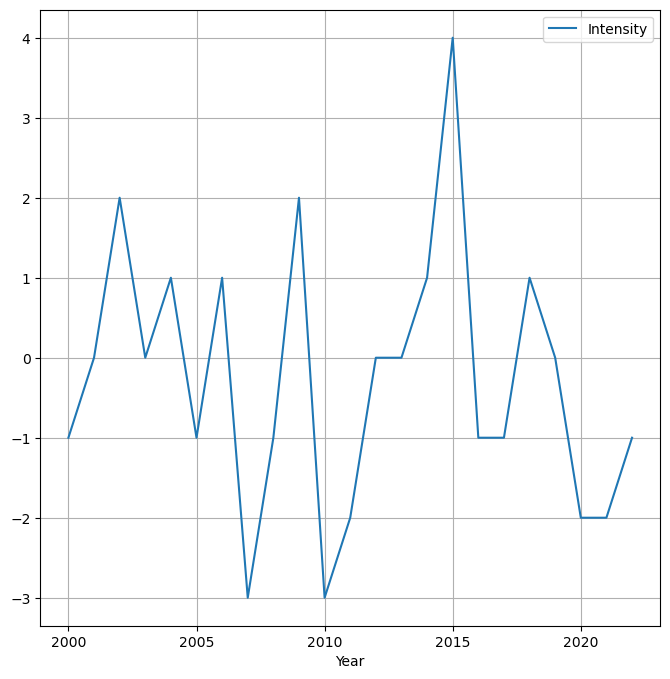

In [ ]:
NinoNina_filtered_date_df.plot(kind="line", y="Intensity", x="Year", grid=True, figsize=(8,8),)

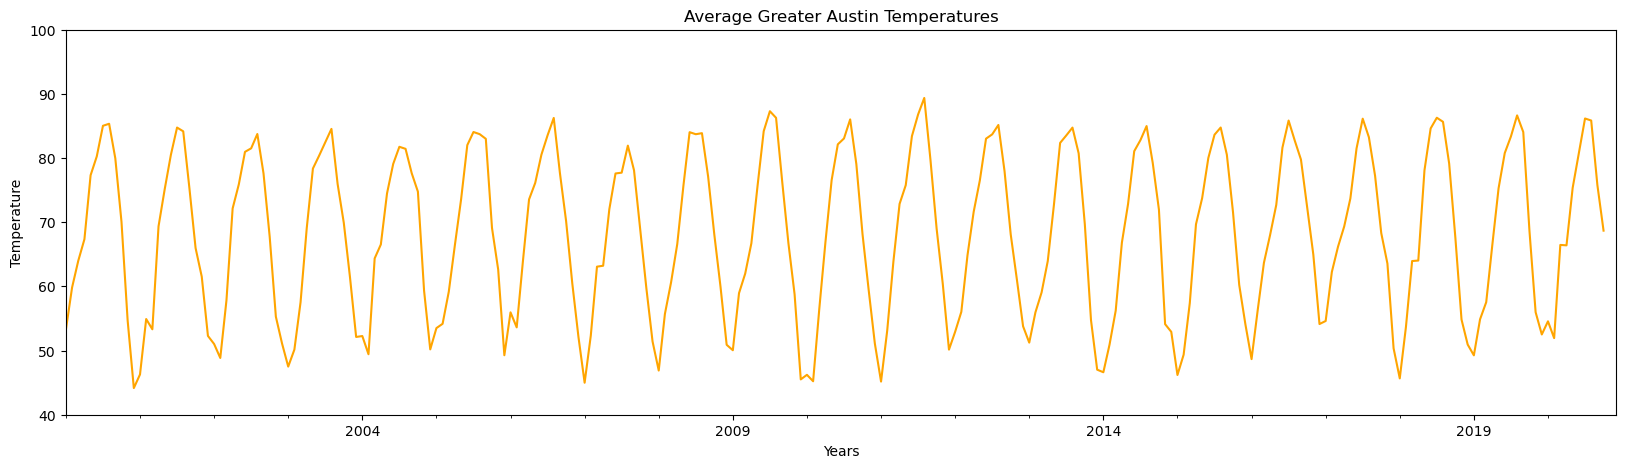

In [319]:
ave_temp_df.plot(kind="line",figsize=(20,5), color=["orange"],title="Average Greater Austin Temperatures",
                 xlabel="Years",
                 ylabel="Temperature",
                 ylim=(40,100),
                )
plt.show()

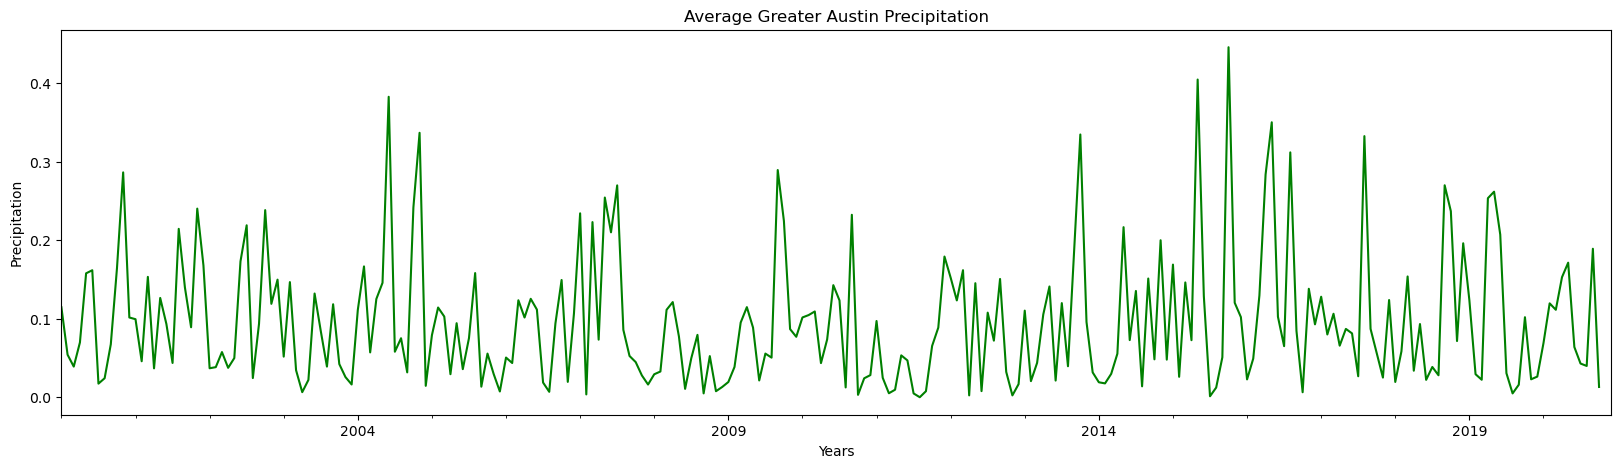

In [320]:
greater_prec_handle = gatxp.plot(kind="line",figsize=(20,5), color=["green"],title="Average Greater Austin Precipitation",
                 xlabel="Years",
                 ylabel="Precipitation"
                )

plt.show()

In [331]:
NinoNina_filtered_date_df.dtypes

Year          int64
Effect       object
Strength     object
Intensity     int64
dtype: object

In [335]:
NinoNina_filtered_date_df["Test"]= pd.to_datetime(NinoNina_filtered_date_df['Year'], format='%Y')
NinoNina_filtered_date_df

C:\Users\15126\AppData\Local\Temp\ipykernel_11772\2876137246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NinoNina_filtered_date_df["Test"]= pd.to_datetime(NinoNina_filtered_date_df['Year'], format='%Y')


,Year,Effect,Strength,Intensity,Test
48,2000,Nina,Weak,-1,2000-01-01
49,2001,None,NaN,0,2001-01-01
50,2002,Nino,Moderate,2,2002-01-01
51,2003,None,NaN,0,2003-01-01
52,2004,Nino,Weak,1,2004-01-01
53,2005,Nina,Weak,-1,2005-01-01
54,2006,Nino,Weak,1,2006-01-01
55,2007,Nina,Strong,-3,2007-01-01
56,2008,Nina,Weak,-1,2008-01-01
57,2009,Nino,Moderate,2,2009-01-01


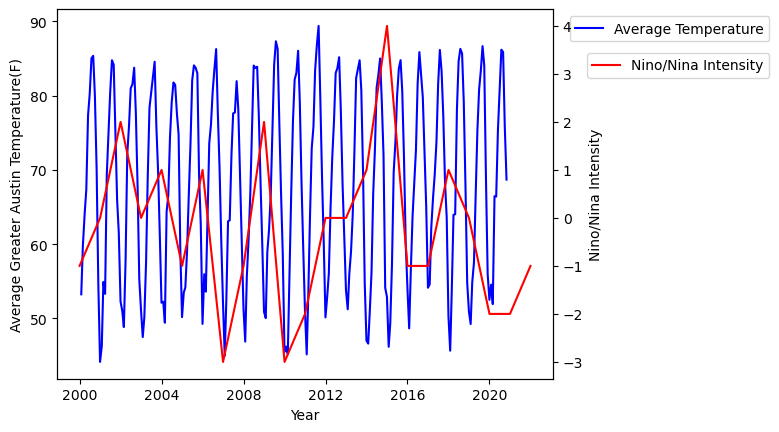

In [340]:
fig, ax1 = plt.subplots()


ax1.plot(greater_atx_max_mean.index,greater_atx_max_mean['average'], label="Average Temperature",color='blue')
ax1.set_ylabel('Average Greater Austin Temperature(F)')
ax2 = ax1.twinx()
ax2.plot(NinoNina_filtered_date_df['Test'],NinoNina_filtered_date_df['Intensity'], label="Nino/Nina Intensity",color="red")
ax2.set_ylabel('Nino/Nina Intensity')

ax1.set_xlabel('Year')
legend1 = ax1.legend(loc='upper right',bbox_to_anchor=(1.450, 1))
legend2 = ax2.legend(loc='upper right',bbox_to_anchor=(1.450, 0.9))
# Combine the legends

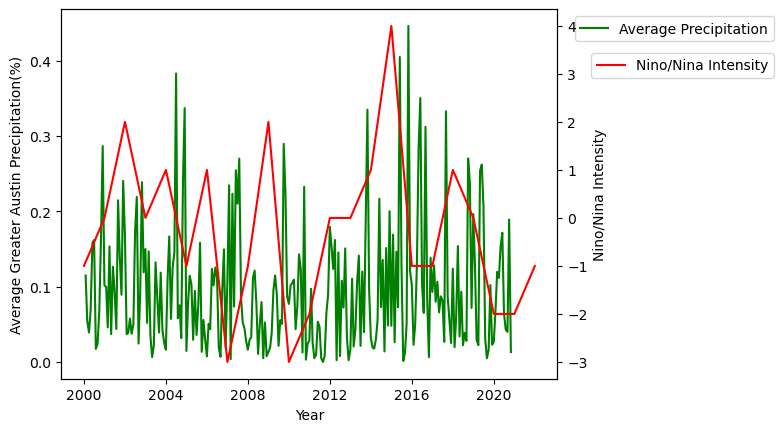

In [341]:
fig, ax1 = plt.subplots()


ax1.plot(greater_atx_prec_mean.index,greater_atx_prec_mean['mean'], label="Average Precipitation",color='green')
ax1.set_ylabel('Average Greater Austin Precipitation(%)')
ax2 = ax1.twinx()
ax2.plot(NinoNina_filtered_date_df['Test'],NinoNina_filtered_date_df['Intensity'], label="Nino/Nina Intensity",color="red")
ax2.set_ylabel('Nino/Nina Intensity')

ax1.set_xlabel('Year')
legend1 = ax1.legend(loc='upper right',bbox_to_anchor=(1.450, 1))
legend2 = ax2.legend(loc='upper right',bbox_to_anchor=(1.450, 0.9))
# Combine the legends